In [1]:
import os
os.chdir("../")

import pickle

from visualization import Visualization

In [2]:
project = 'rehersal ResNet CIFAR10 Task IL Contrastive Losss'


viz = Visualization(project=project,UID=['rehearsal_dataset', 'batch_size_rehearsal', 'pretraining', 'learning_rate', 'epochs', 'contrastive_learning_rate'], y_min=30)

In [3]:
# viz.plot_single_setting_aggregated('stat-wmm;128;True;0.003;5;nan', fontsize=25, filename="example_run_stat-wmm_rehearsal", layout='vertical')


# viz.plot_single_setting_aggregated(';128;False;0.003;5;nan', fontsize=25, filename="example_run_no_rehearsal", layout='vertical')

In [4]:
viz.extract_all_runs_metrics_after_task_3()

In [5]:
from matplotlib import pyplot as plt
import numpy as np


def box_plot(metric_name, df, filename=None):
    UIDS = df['UID'].unique()

    values = []
    for uid in UIDS:
        values.append(df[df['UID'] == uid][metric_name].median())

    order = np.argsort(values)
    UIDS = UIDS[order]

    plt.figure(figsize=(20, 10))
    for i, uid in enumerate(UIDS):
        plt.boxplot(df[df['UID'] == uid][metric_name], positions=[i], widths=0.6)

    labels = UIDS
    # labels = [f"{uid.split(';')[1]}" for uid in UIDS]

    plt.xticks(np.arange(len(UIDS)), labels, rotation=90)
    plt.title(f"metic: {metric_name}       label convention: dataset pretraining? epochs")
    plt.xlabel("unique identifier")
    plt.ylabel("accuracy [%]")
    plt.show()

    if filename:
        plt.savefig("images/"+filename+".pdf", format='pdf')
        plt.savefig("images/"+filename+".svg", format='svg')

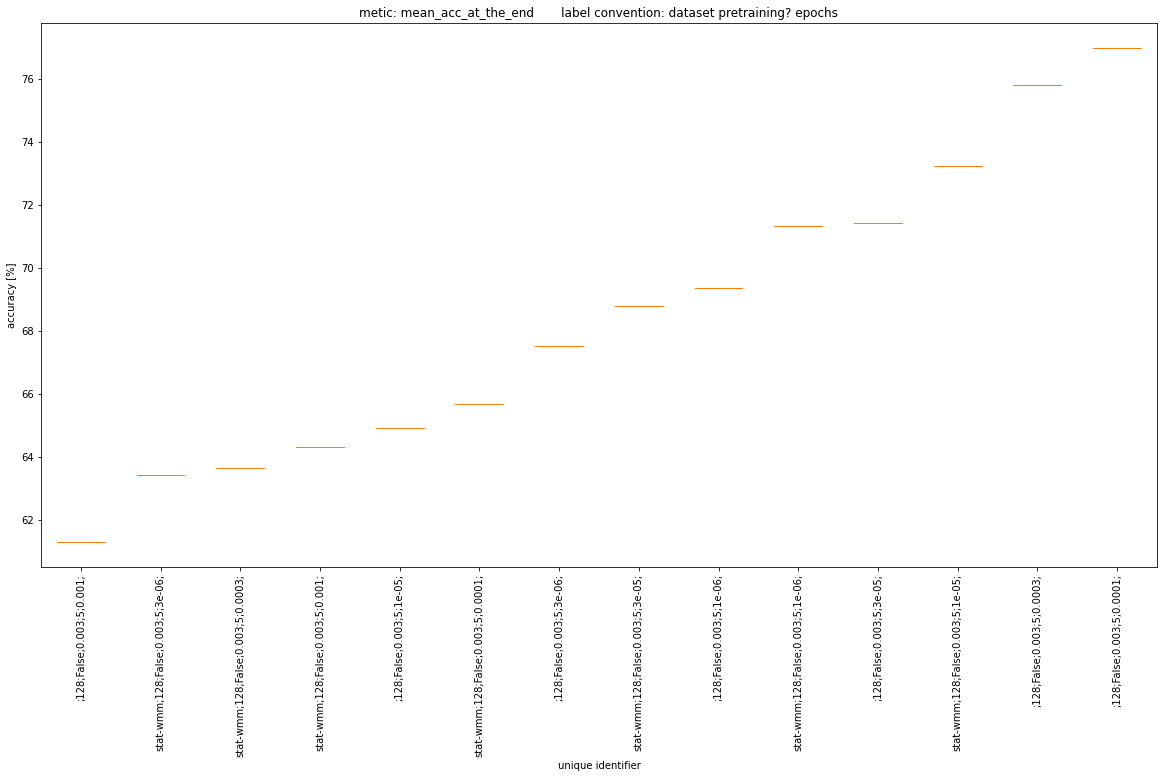

,UID,acc_at_the_end_task_0,acc_mean_task_0,acc_mean_decrease_per_task_0,acc_max0,acc_min0,acc_at_the_end_task_1,acc_mean_task_1,acc_mean_decrease_per_task_1,acc_max1,...,batch_size_rehearsal,pretraining,learning_rate,epochs,contrastive_learning_rate,mean_acc_at_the_end,median_acc_at_the_end,mean_acc_mean,mean_acc_mean_decrease_per_task,mean_acc_max
0,;128;False;0.003;5;0.001;,54.849998,59.084167,4.262501,71.900002,52.500000,58.349998,58.997396,2.250000,65.099998,...,128,False,0.003,5,0.001,61.299998,58.349998,29.805622,1.567501,64.900001
1,;128;False;0.003;5;1e-05;,71.099998,70.023750,0.225000,72.000000,54.099998,60.900002,58.959896,0.600000,62.700001,...,128,False,0.003,5,1e-05,64.916667,62.750000,28.674580,0.580000,60.070000
2,;128;False;0.003;5;0.0001;,74.750000,76.944166,1.725000,81.650002,51.700001,79.750000,73.453646,0.250000,80.500000,...,128,False,0.003,5,0.0001,76.983332,76.449997,31.791483,0.700000,68.710001
3,;128;False;0.003;5;0.0003;,77.550003,76.976667,0.762499,80.599998,48.349998,69.400002,66.065625,1.599998,74.199997,...,128,False,0.003,5,0.0003,75.816668,77.550003,31.128569,0.802499,67.919999
4,;128;False;0.003;5;1e-06;,72.599998,70.846250,0.412500,74.250000,50.650002,71.949997,69.170313,0.983335,74.900002,...,128,False,0.003,5,1e-06,69.349998,71.949997,29.064017,0.309167,61.540000
5,;128;False;0.003;5;3e-06;,59.950001,62.205417,1.637500,66.500000,49.400002,67.250000,63.012500,0.666667,69.250000,...,128,False,0.003,5,3e-06,67.533334,67.250000,29.251861,0.840833,62.890000
6,;128;False;0.003;5;3e-05;,64.099998,63.682500,0.625000,66.599998,53.450001,74.750000,69.165104,0.550001,76.400002,...,128,False,0.003,5,3e-05,71.433332,74.750000,29.611427,0.305000,64.109999
7,stat-wmm;128;False;0.003;5;3e-05;,59.900002,58.472917,0.087500,60.250000,48.500000,76.800003,70.417188,0.250000,77.550003,...,128,False,0.003,5,3e-05,68.800001,69.699997,28.764115,0.242500,61.780000
8,stat-wmm;128;False;0.003;5;0.0003;,62.500000,62.648333,1.375000,68.000000,47.650002,62.150002,59.976563,0.983332,65.099998,...,128,False,0.003,5,0.0003,63.650002,62.500000,29.214086,0.996666,61.869999
9,stat-wmm;128;False;0.003;5;1e-06;,68.550003,66.795000,0.362499,70.000000,48.049999,75.250000,69.861979,0.466667,76.650002,...,128,False,0.003,5,1e-06,71.333333,70.199997,29.718441,0.615833,63.430000


In [6]:
df = viz.metrics_df.copy()

# df = df[(df['learning_rate']=='0.003') & (df['epochs']=='5') & (df['rehearsal_dataset']=='stat-wmm') & (df['pretraining']=='True') & (df['separate_noise_output'].isin(['None']))]
# df = df[(df['batch_size_rehearsal'] != '128')]

box_plot('mean_acc_at_the_end', df)

df

# All runs

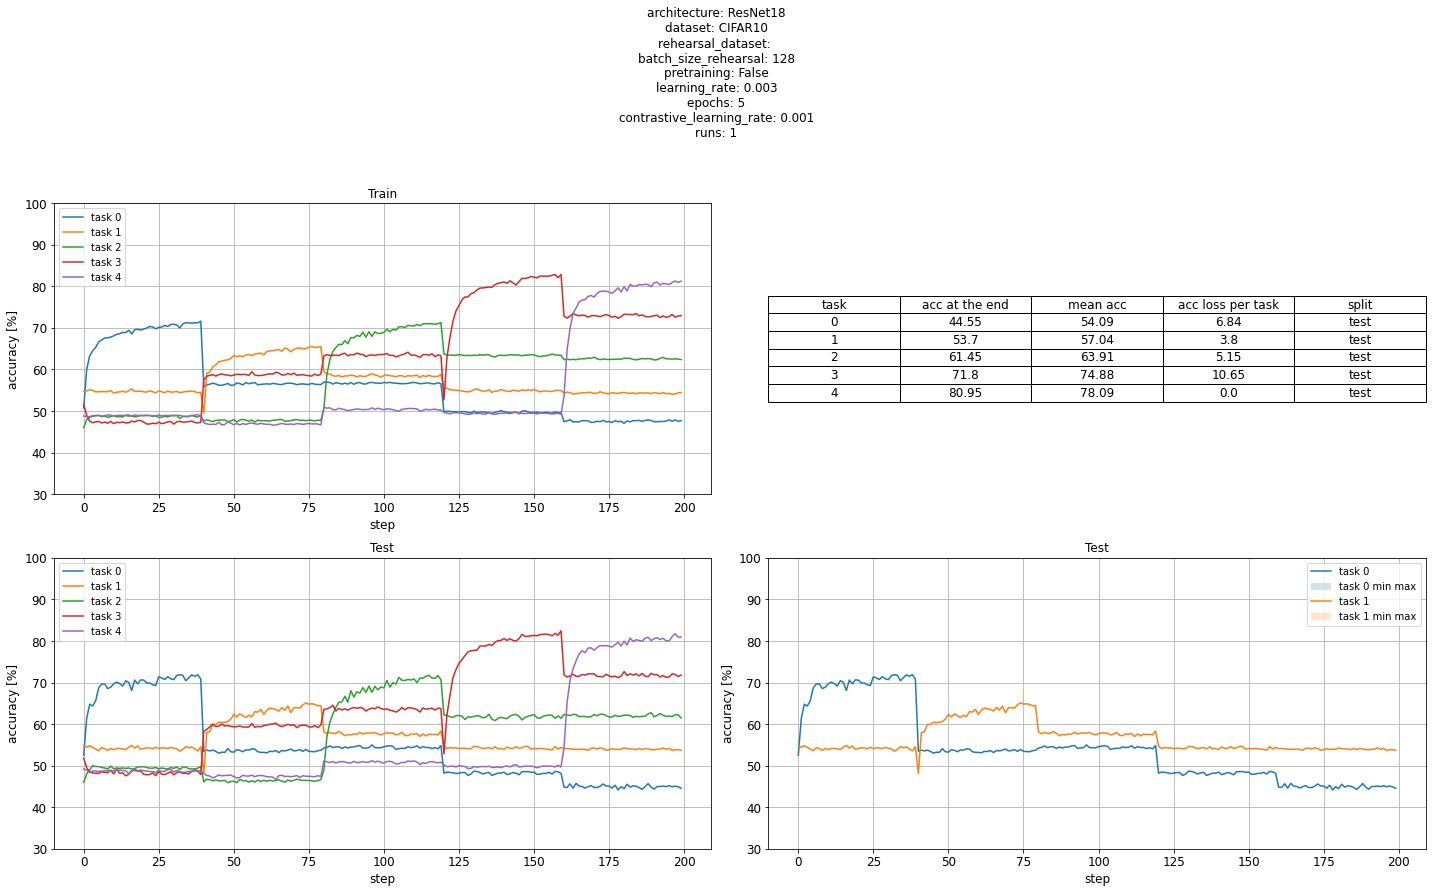

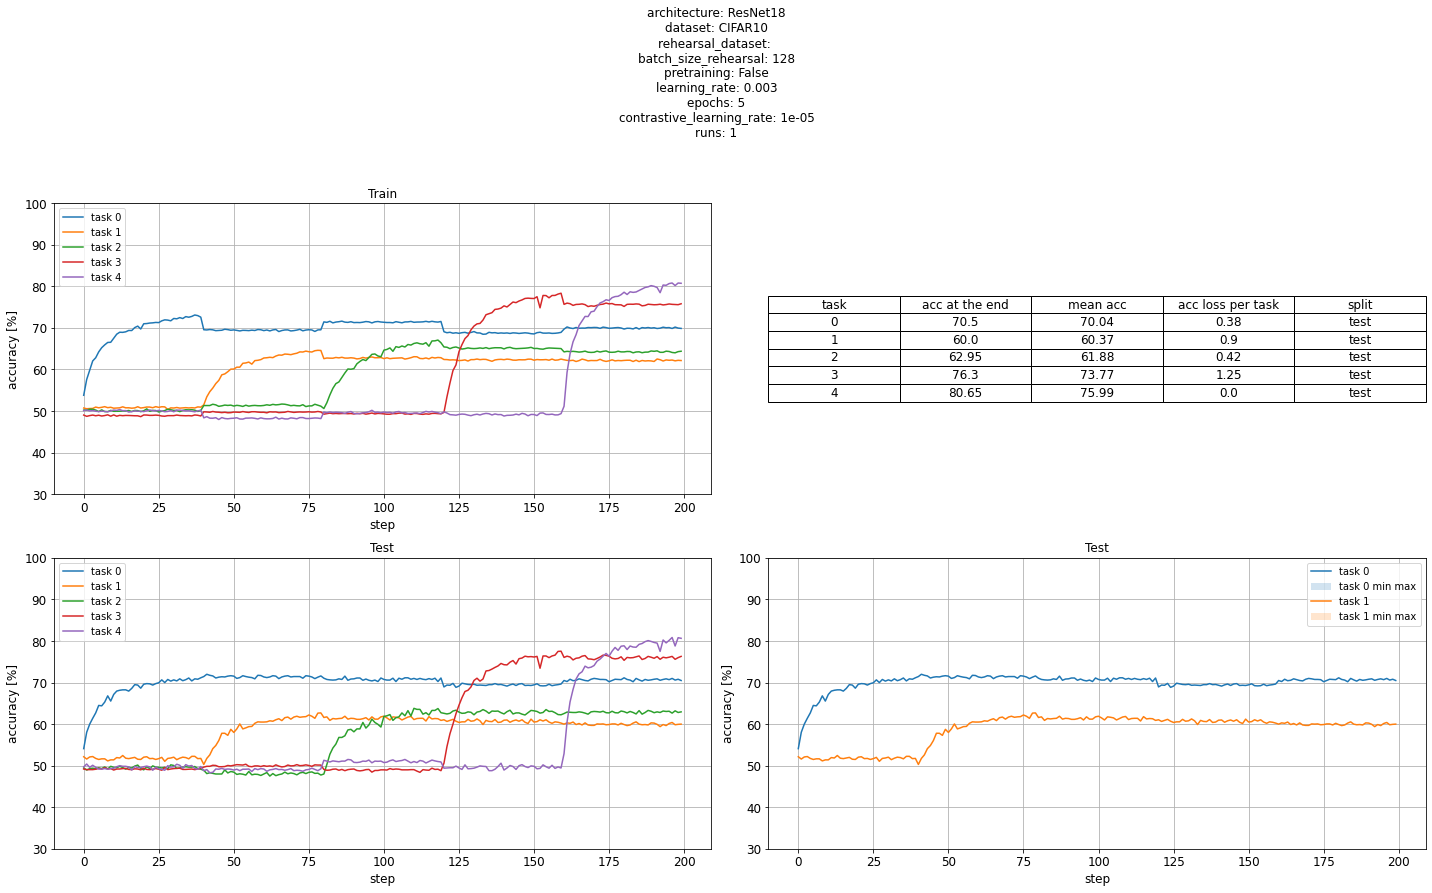

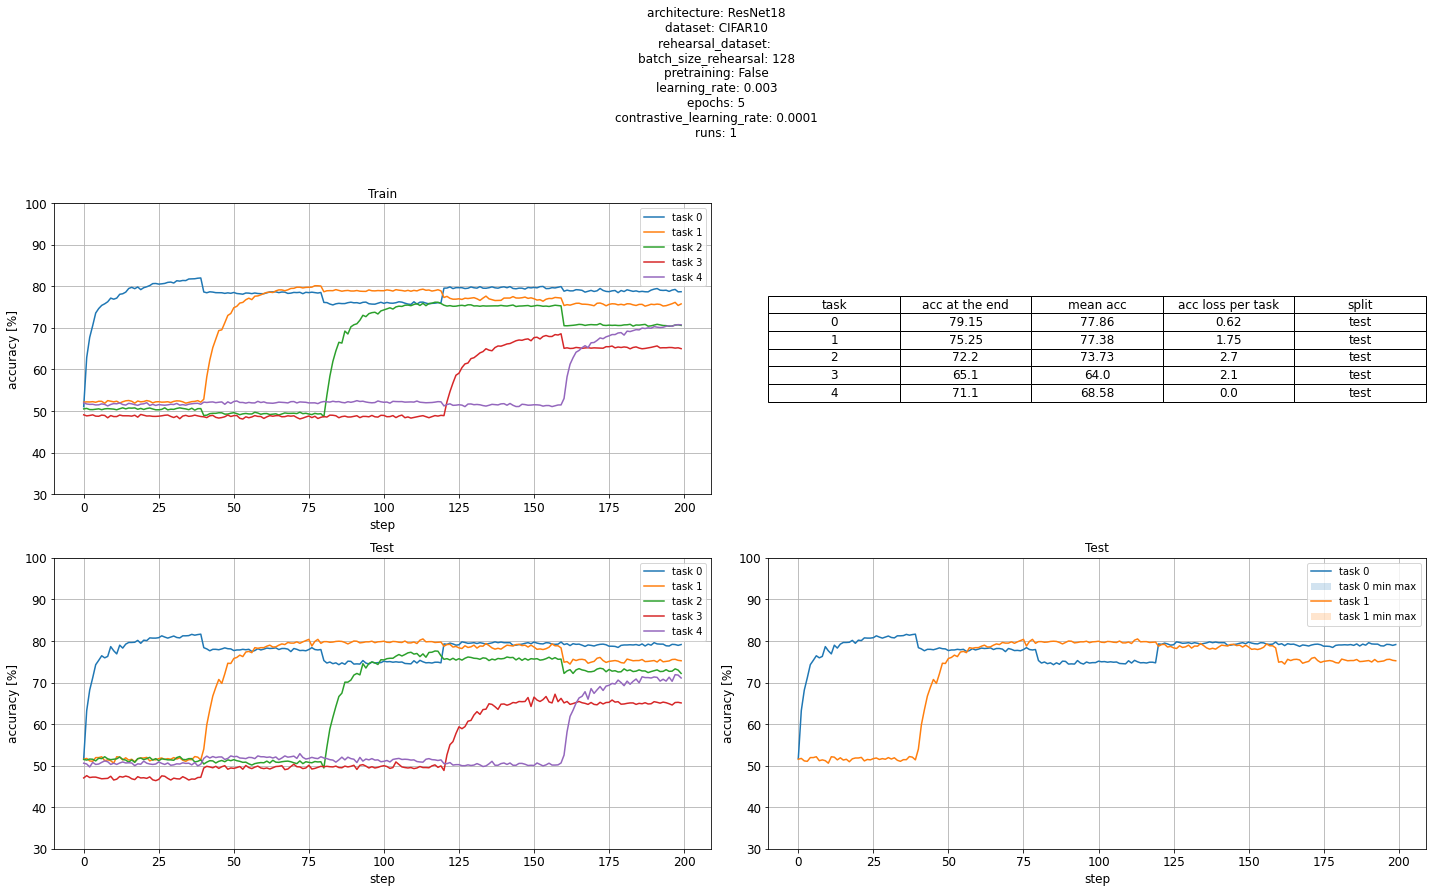

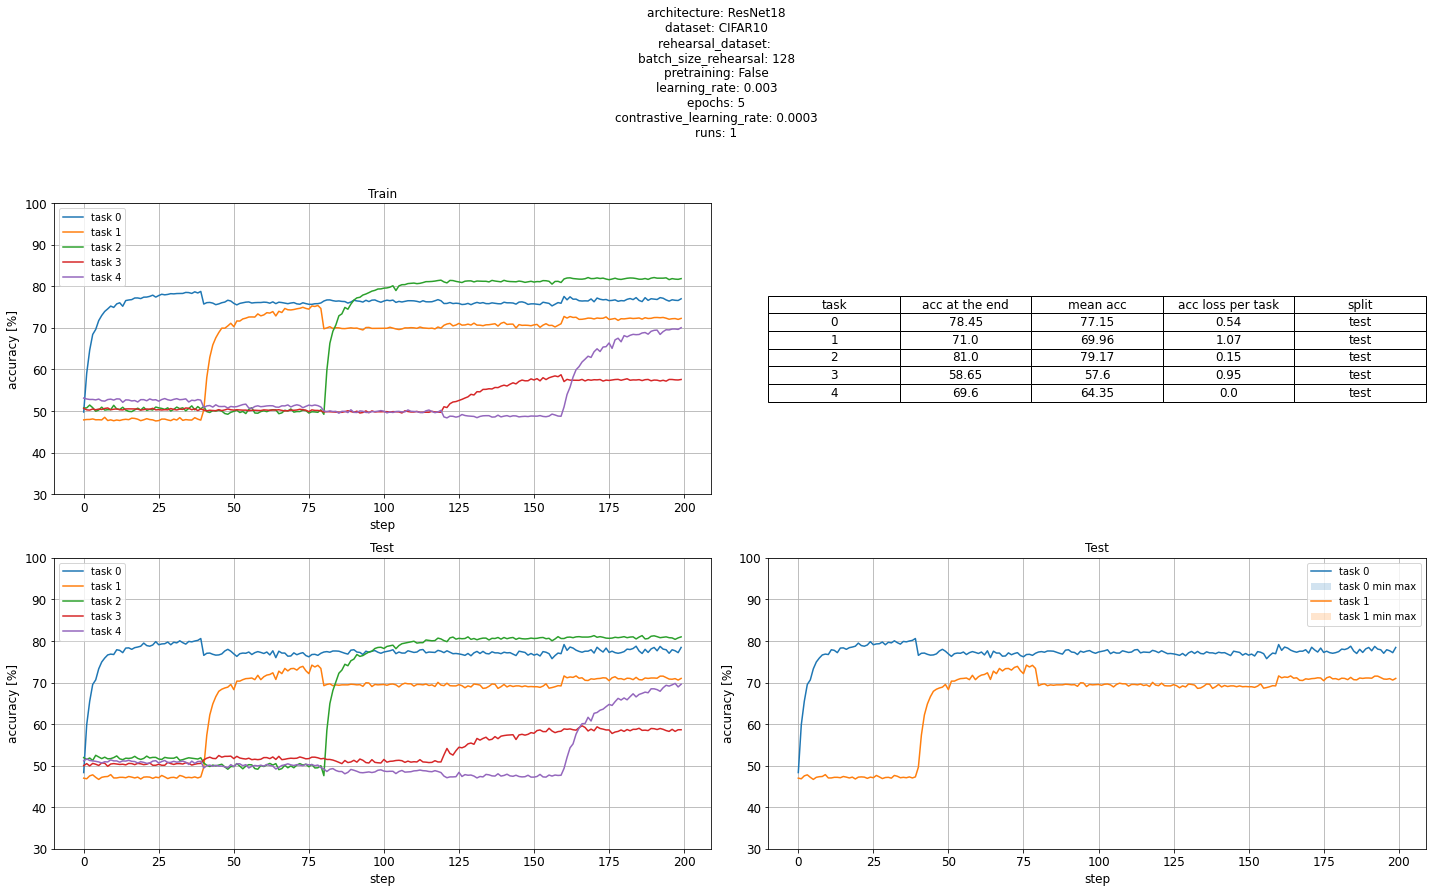

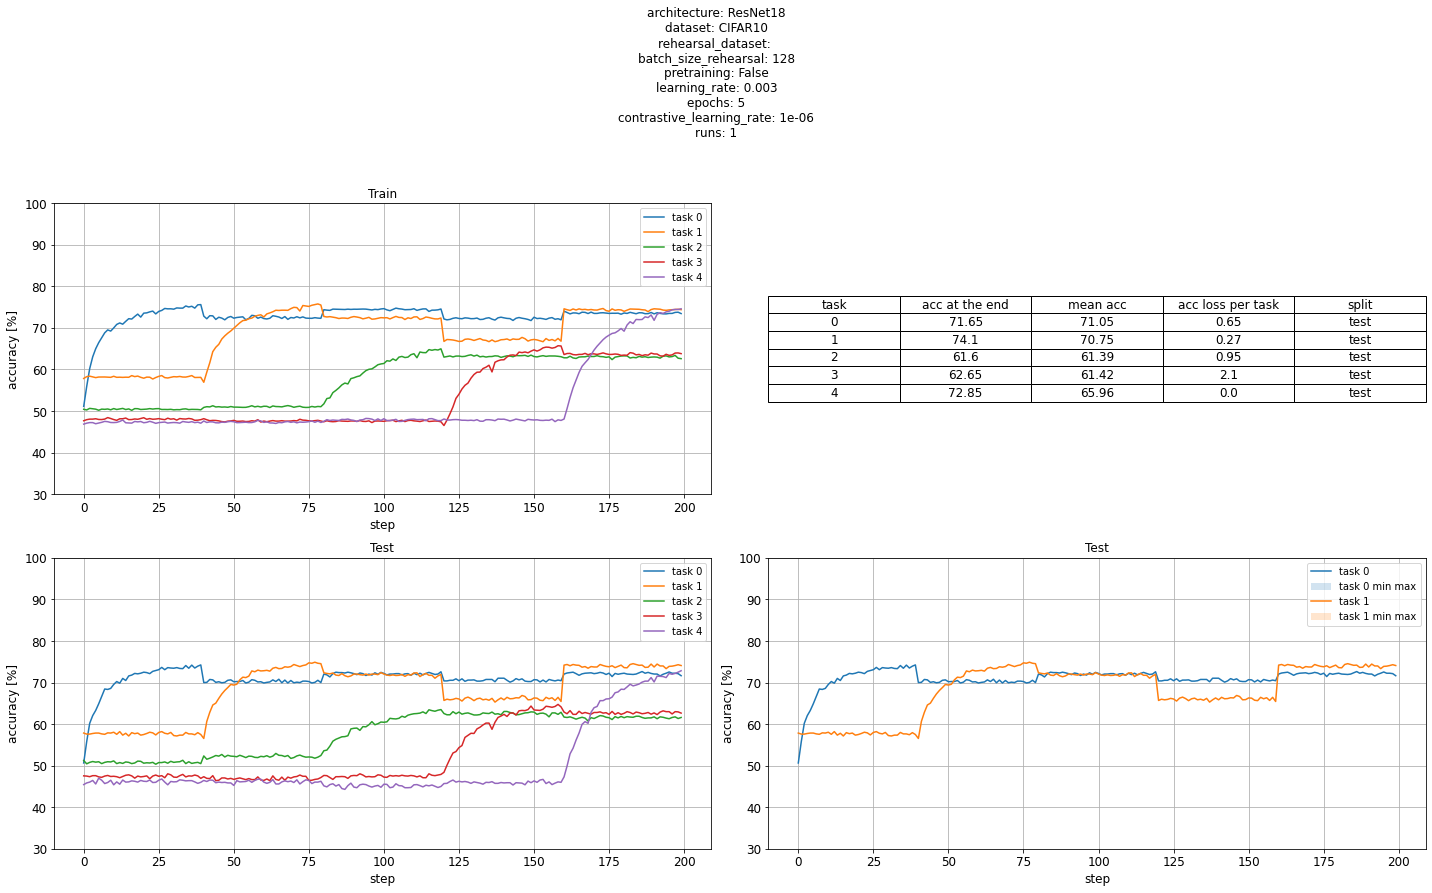

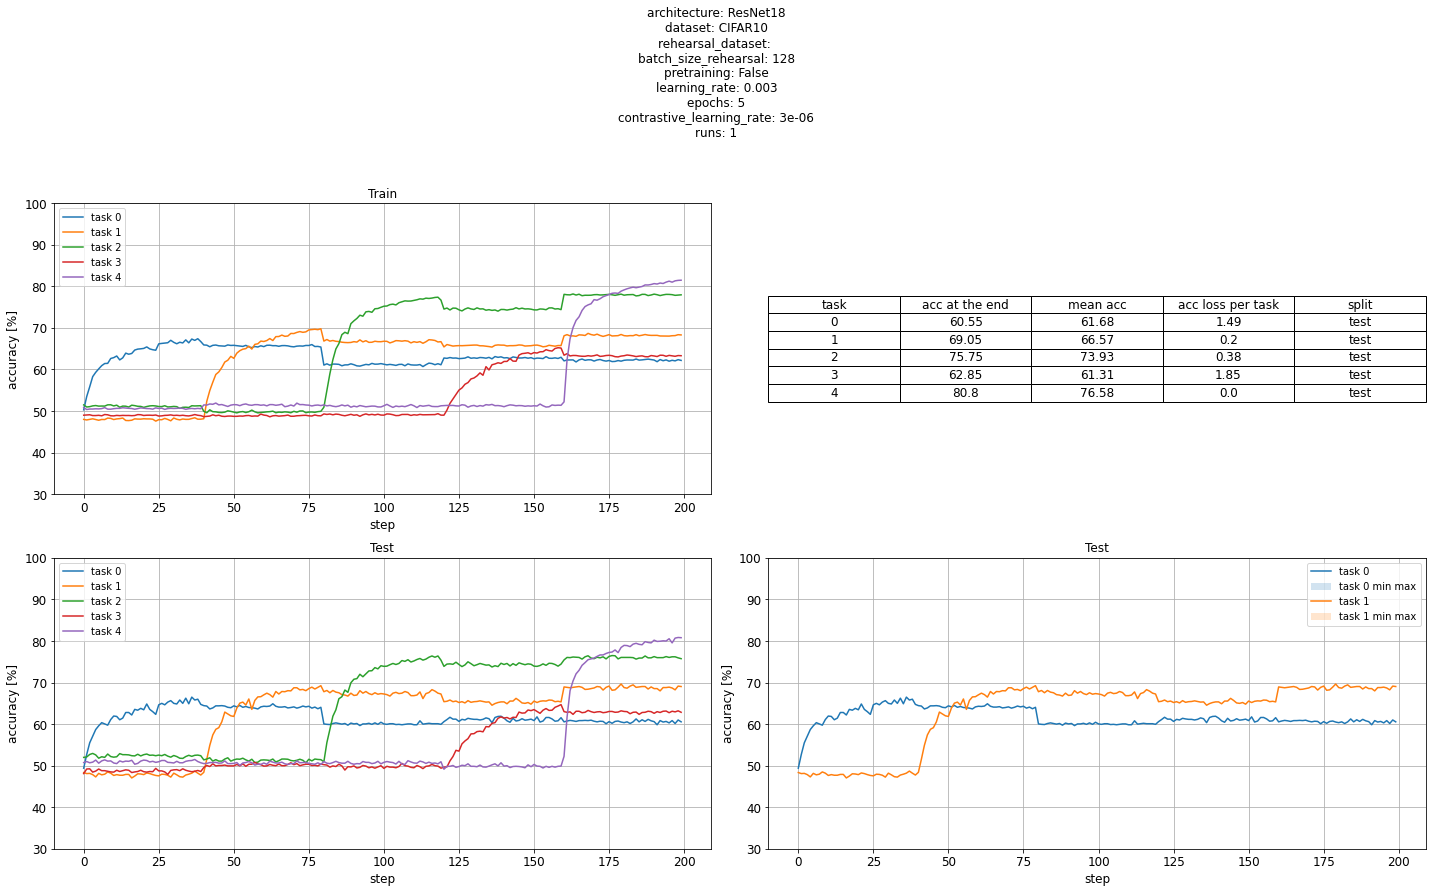

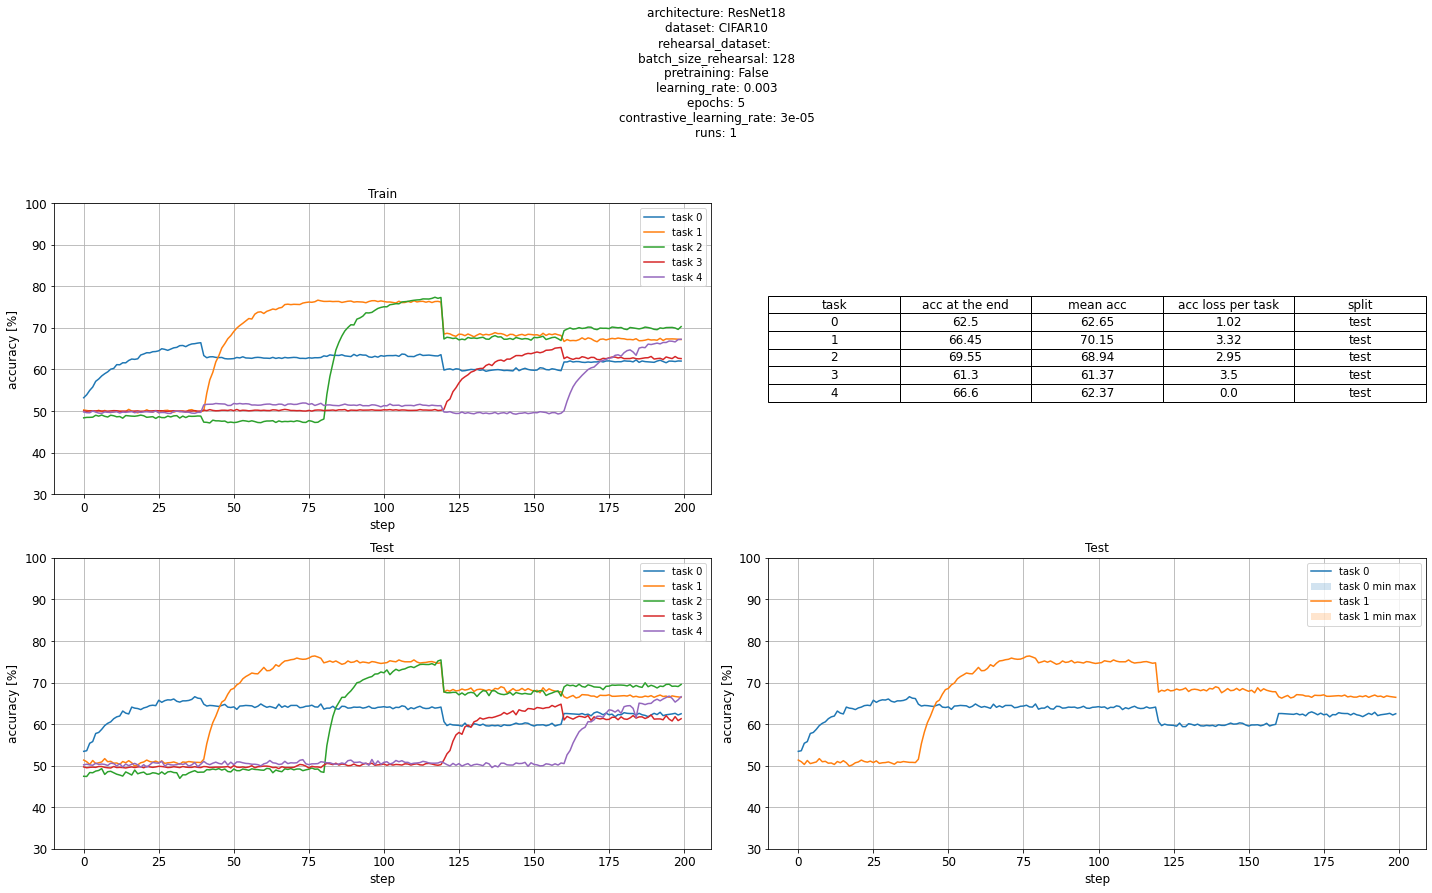

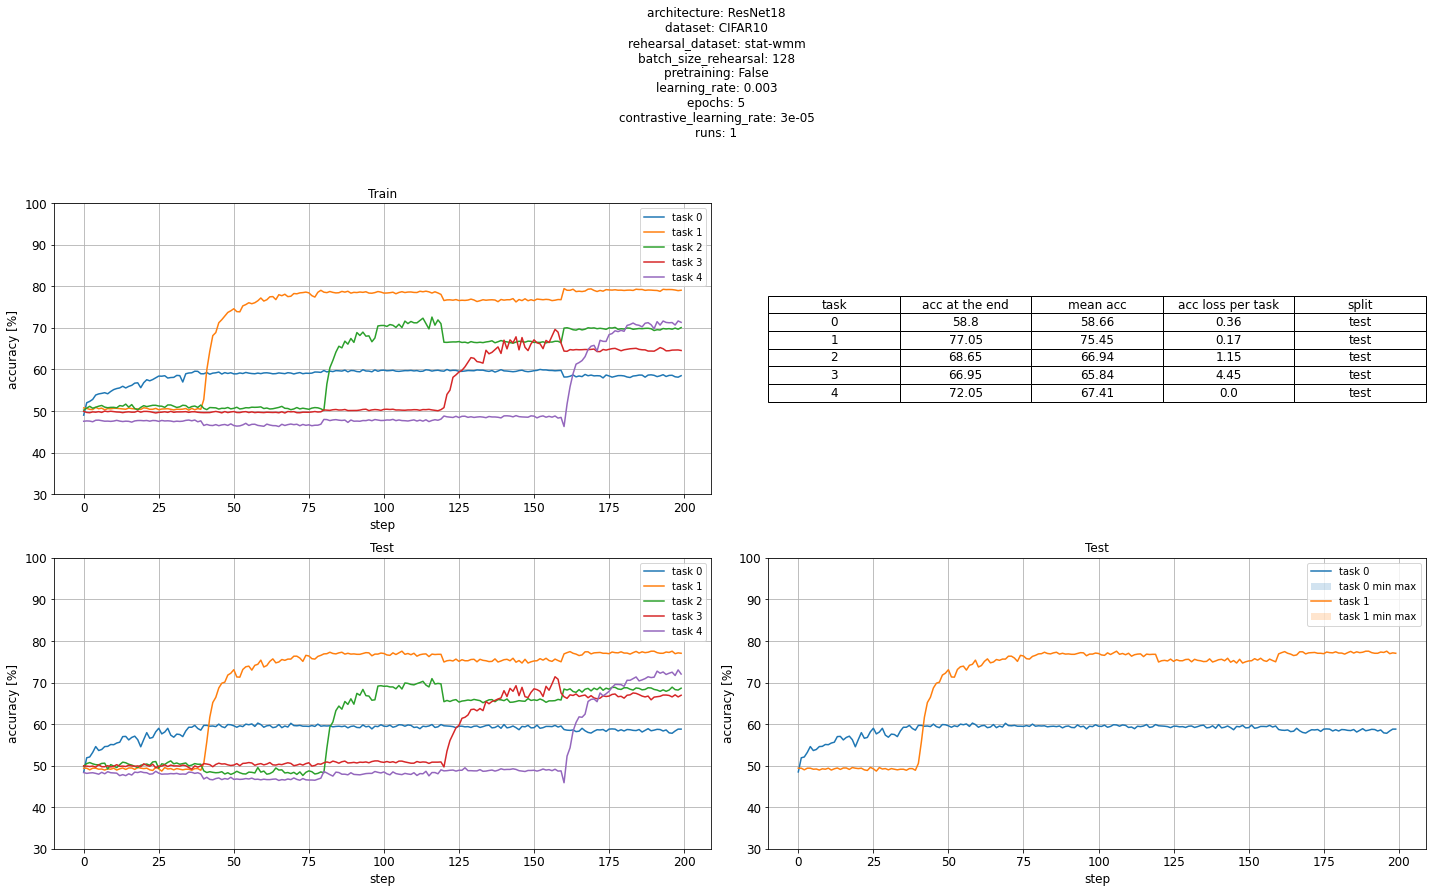

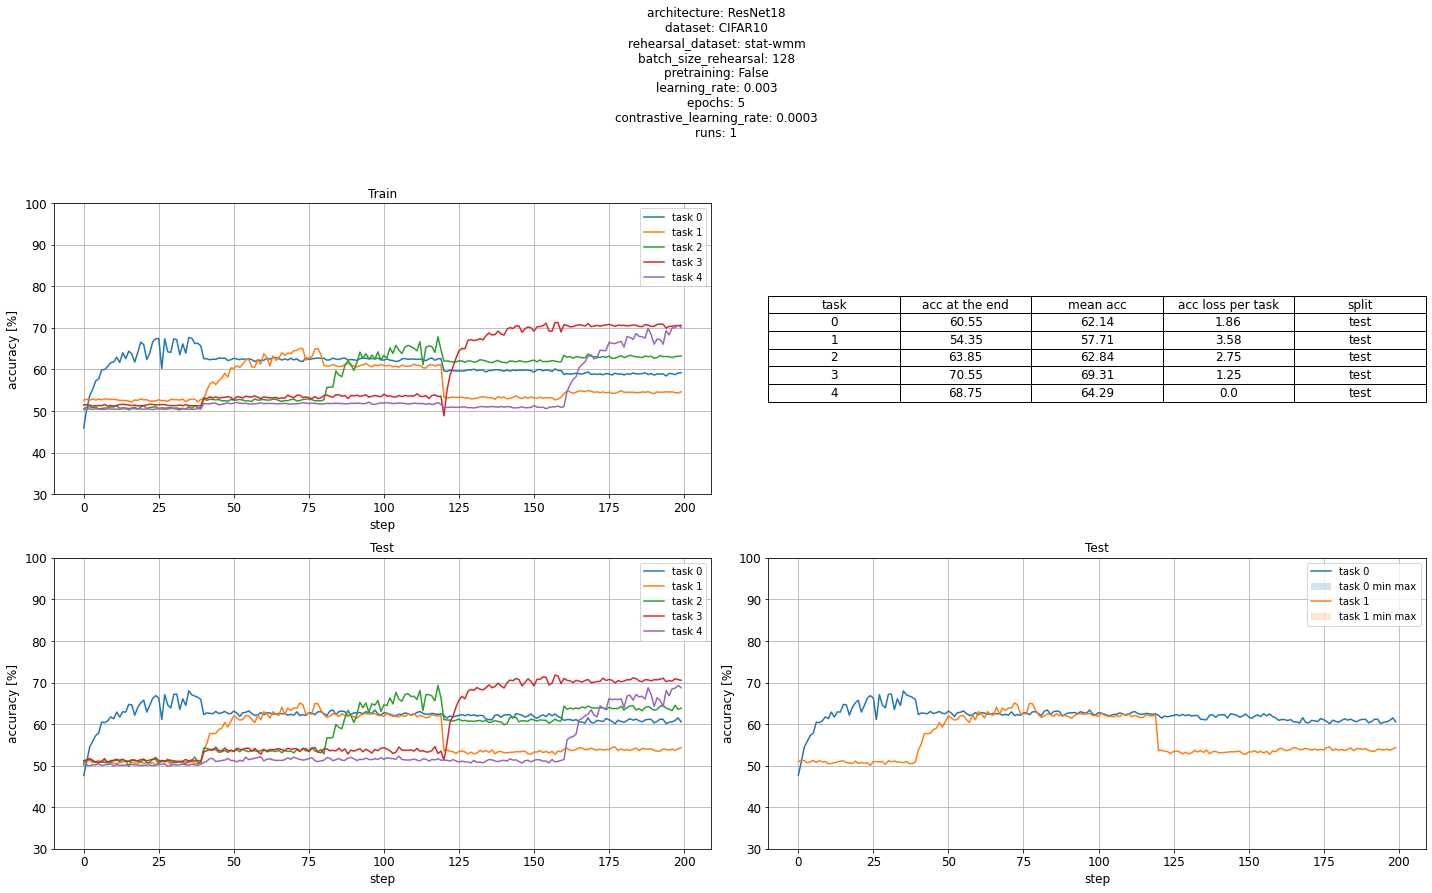

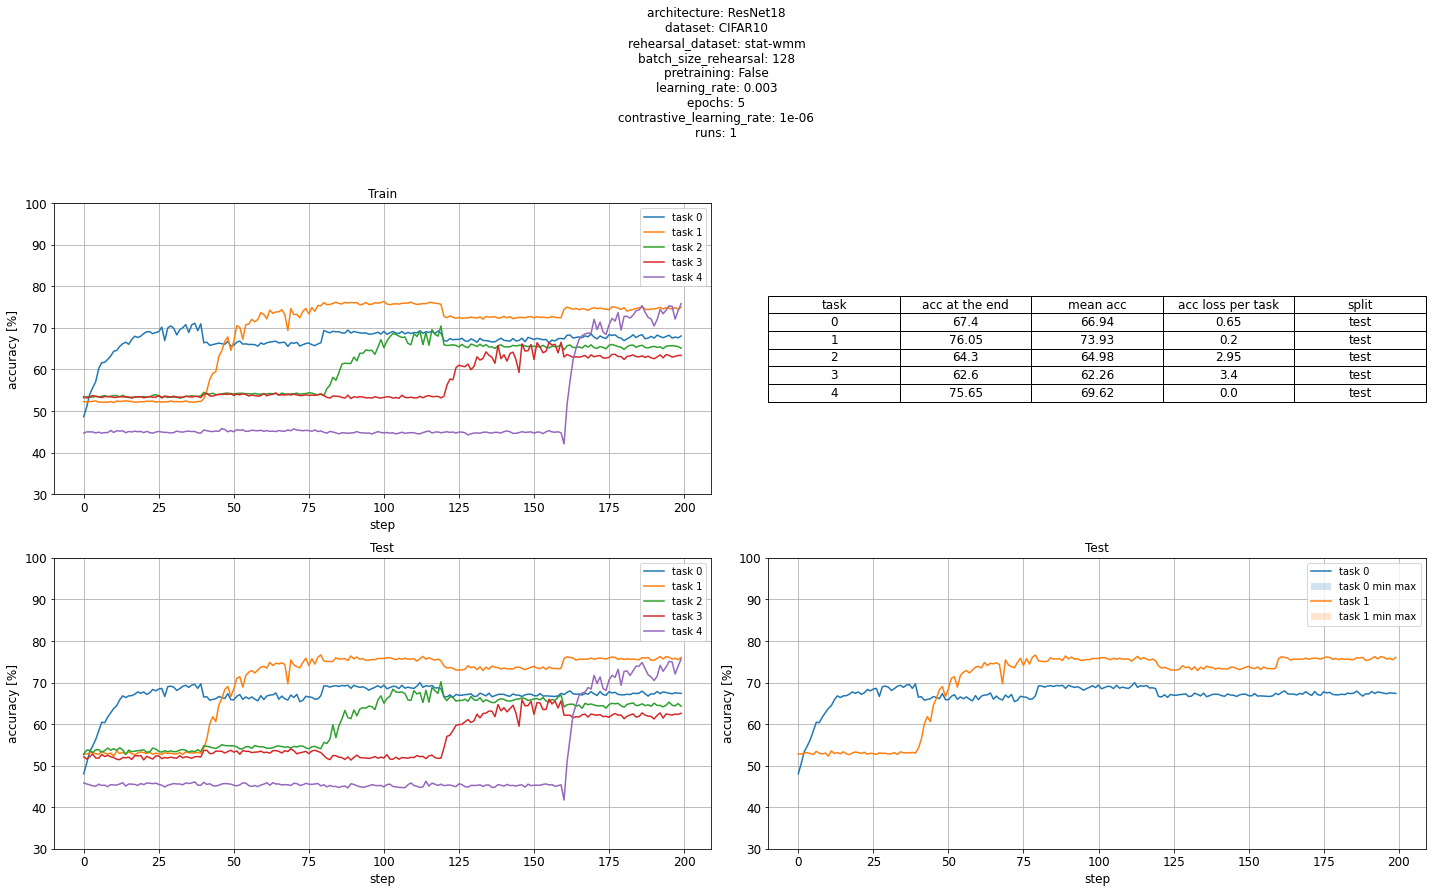

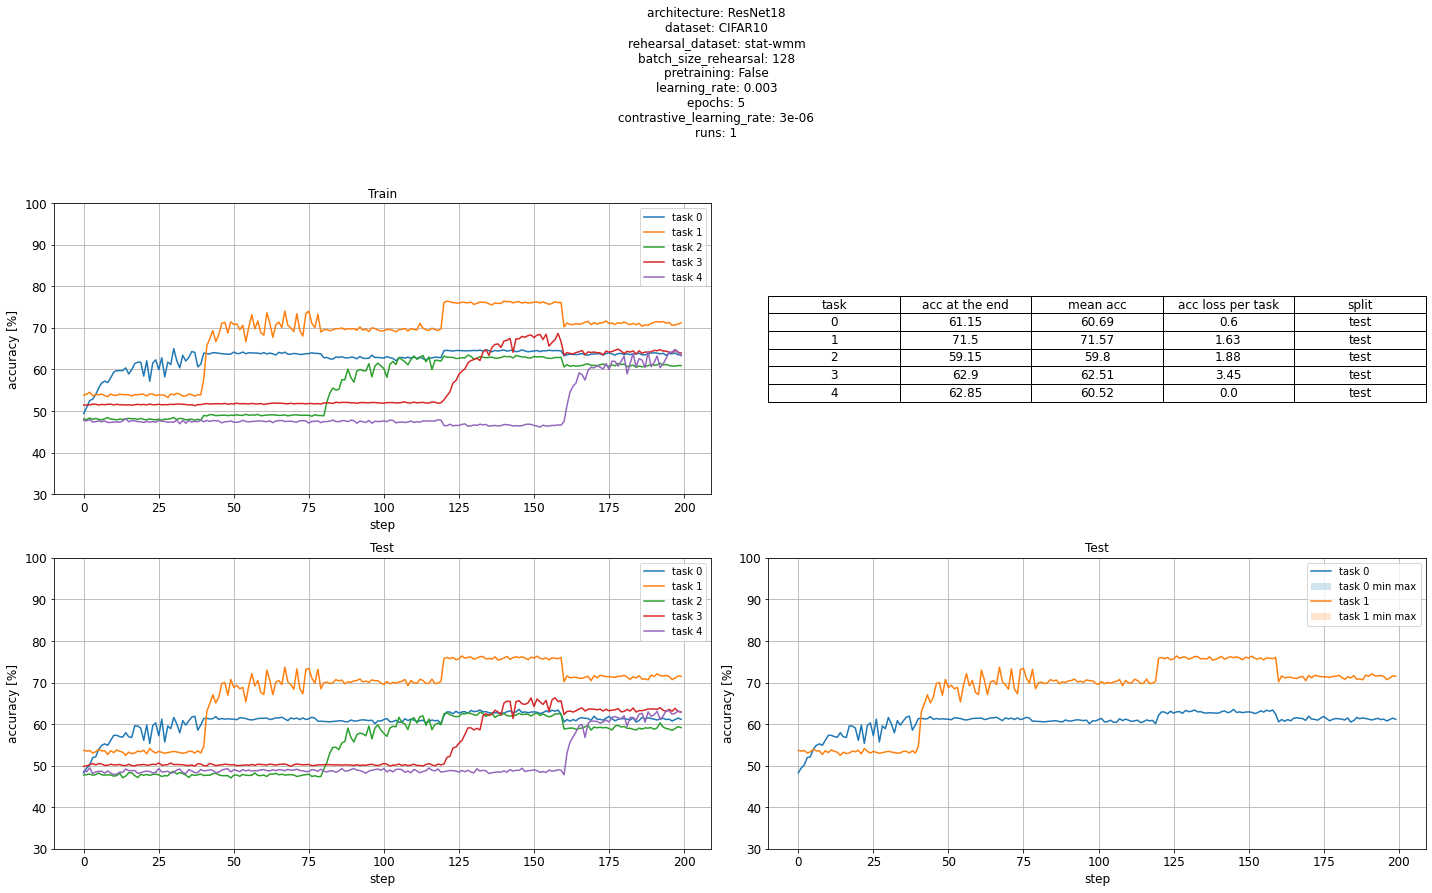

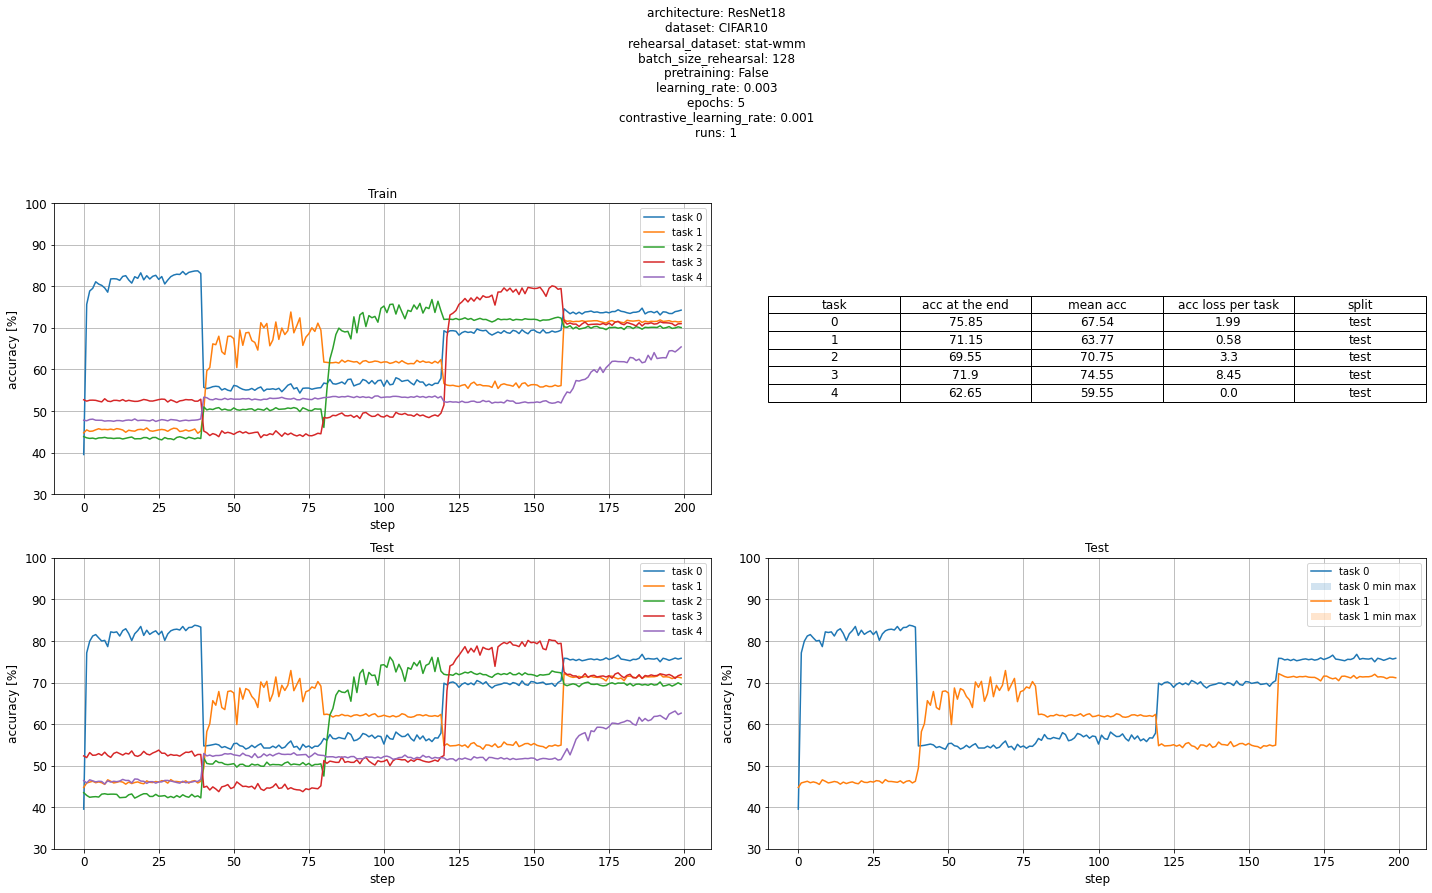

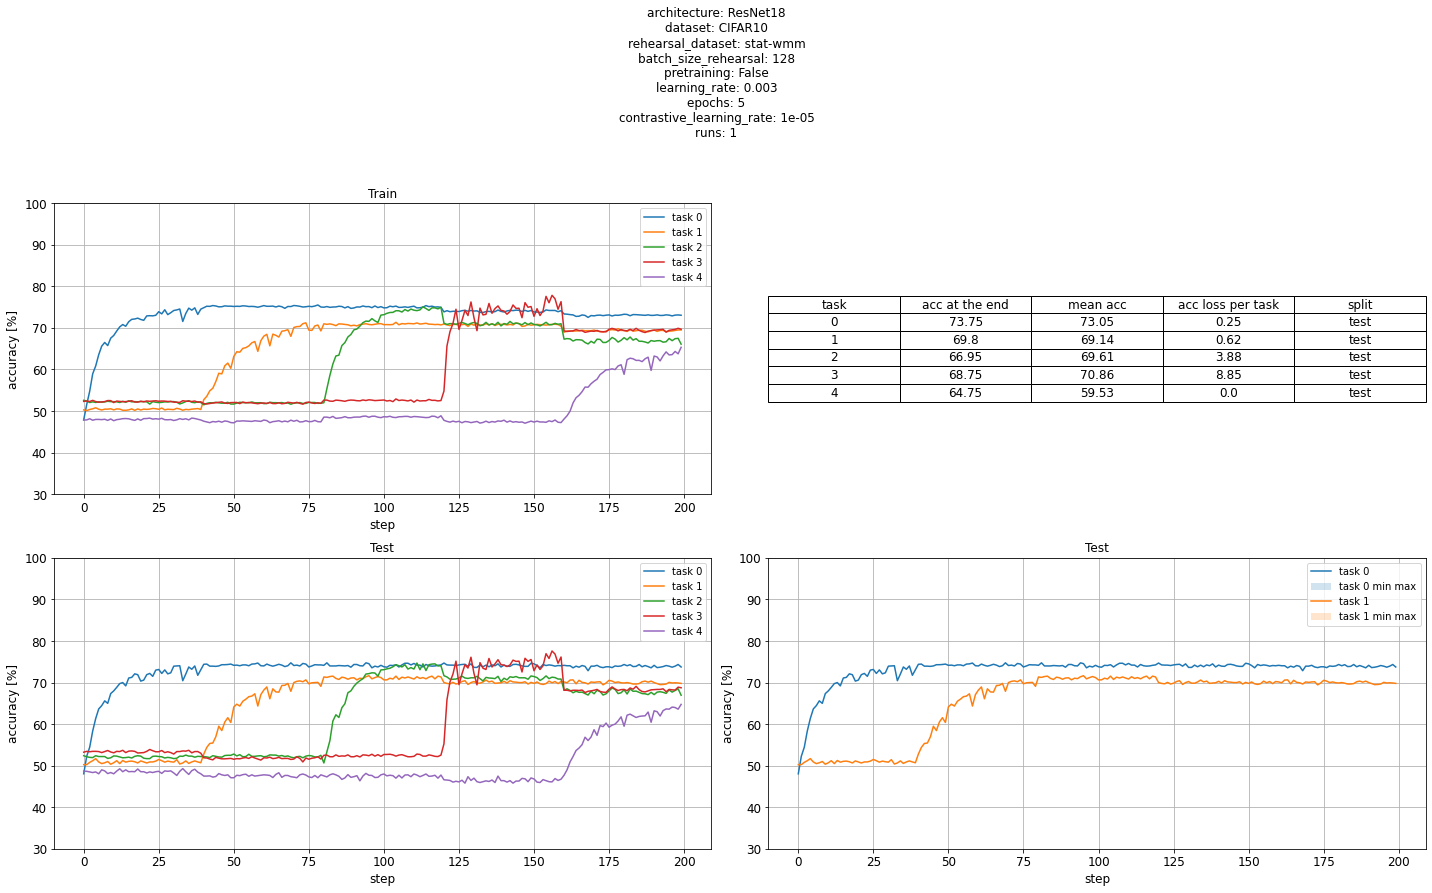

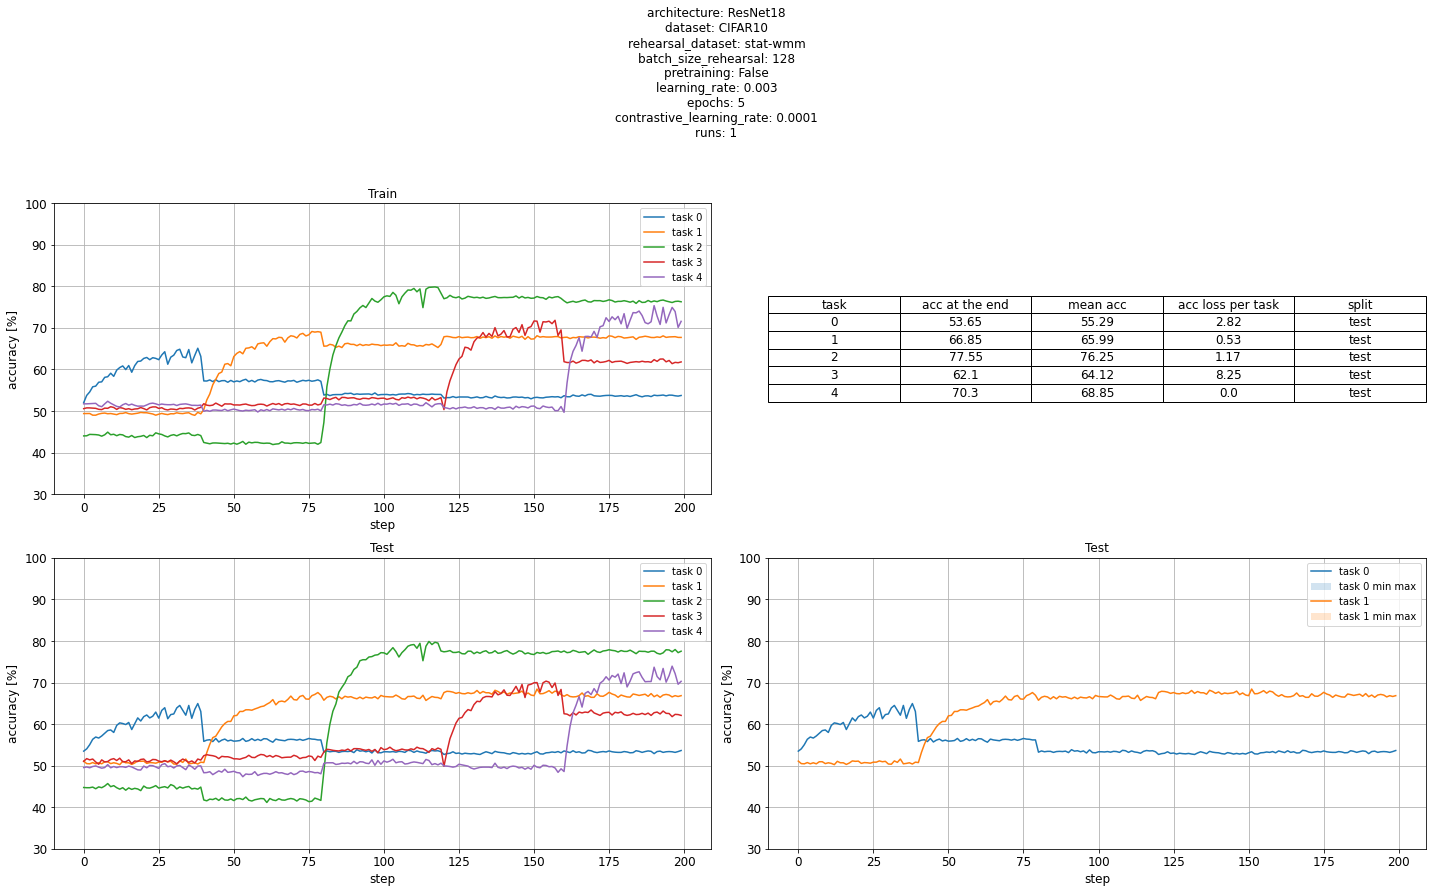

In [7]:
viz.plot_everything()